This notebook contains code and process of identifying a suitable number of samples for analysis, balancing time and robustness of analysis.

In [1]:
import json
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('../outputs/farm_300_run_sci_mode.json', 'r') as file:
    data = json.load(file)

In [3]:
data.keys()

dict_keys(['Input Parameters', 'Crop Nitrogen Residue', 'Emission Factors', 'Total Direct Nitrogen Emission'])

In [4]:
results = data['Total Direct Nitrogen Emission']
results.keys()

dict_keys(['P', 'PE', 'FR_Topo', 'soil_texture', 'RF_AM', 'RF_CS', 'RF_NS', 'RF_Till', 'carbon_concentration', 'S_s', 'S_r', 'S_p', 'moisture', 'R_p', 'R_s', 'R_r', 'R_e', 'N_p', 'N_s', 'N_r', 'N_e'])

In [5]:
type(results['P']['co2_crop_direct'])

list

In [23]:
num_samples = [50, 80, 90, 100, 120, 140, 160, 180, 200, 300]

In [24]:
sampling_var = {}
for key, value in results.items():
    # print(type(results[key]))
    sampling_var[key] = [np.nanstd(random.sample(results[key]['co2_crop_direct'], num), ddof=1) for num in num_samples]

In [26]:
sampling_results = {}

for key, value in results.items():
    # print(type(results[key]))
    sampling_results[key] = [random.sample(results[key]['co2_crop_direct'], num) for num in num_samples]

In [27]:
number_params = len(sampling_results.keys())
number_params
    

21

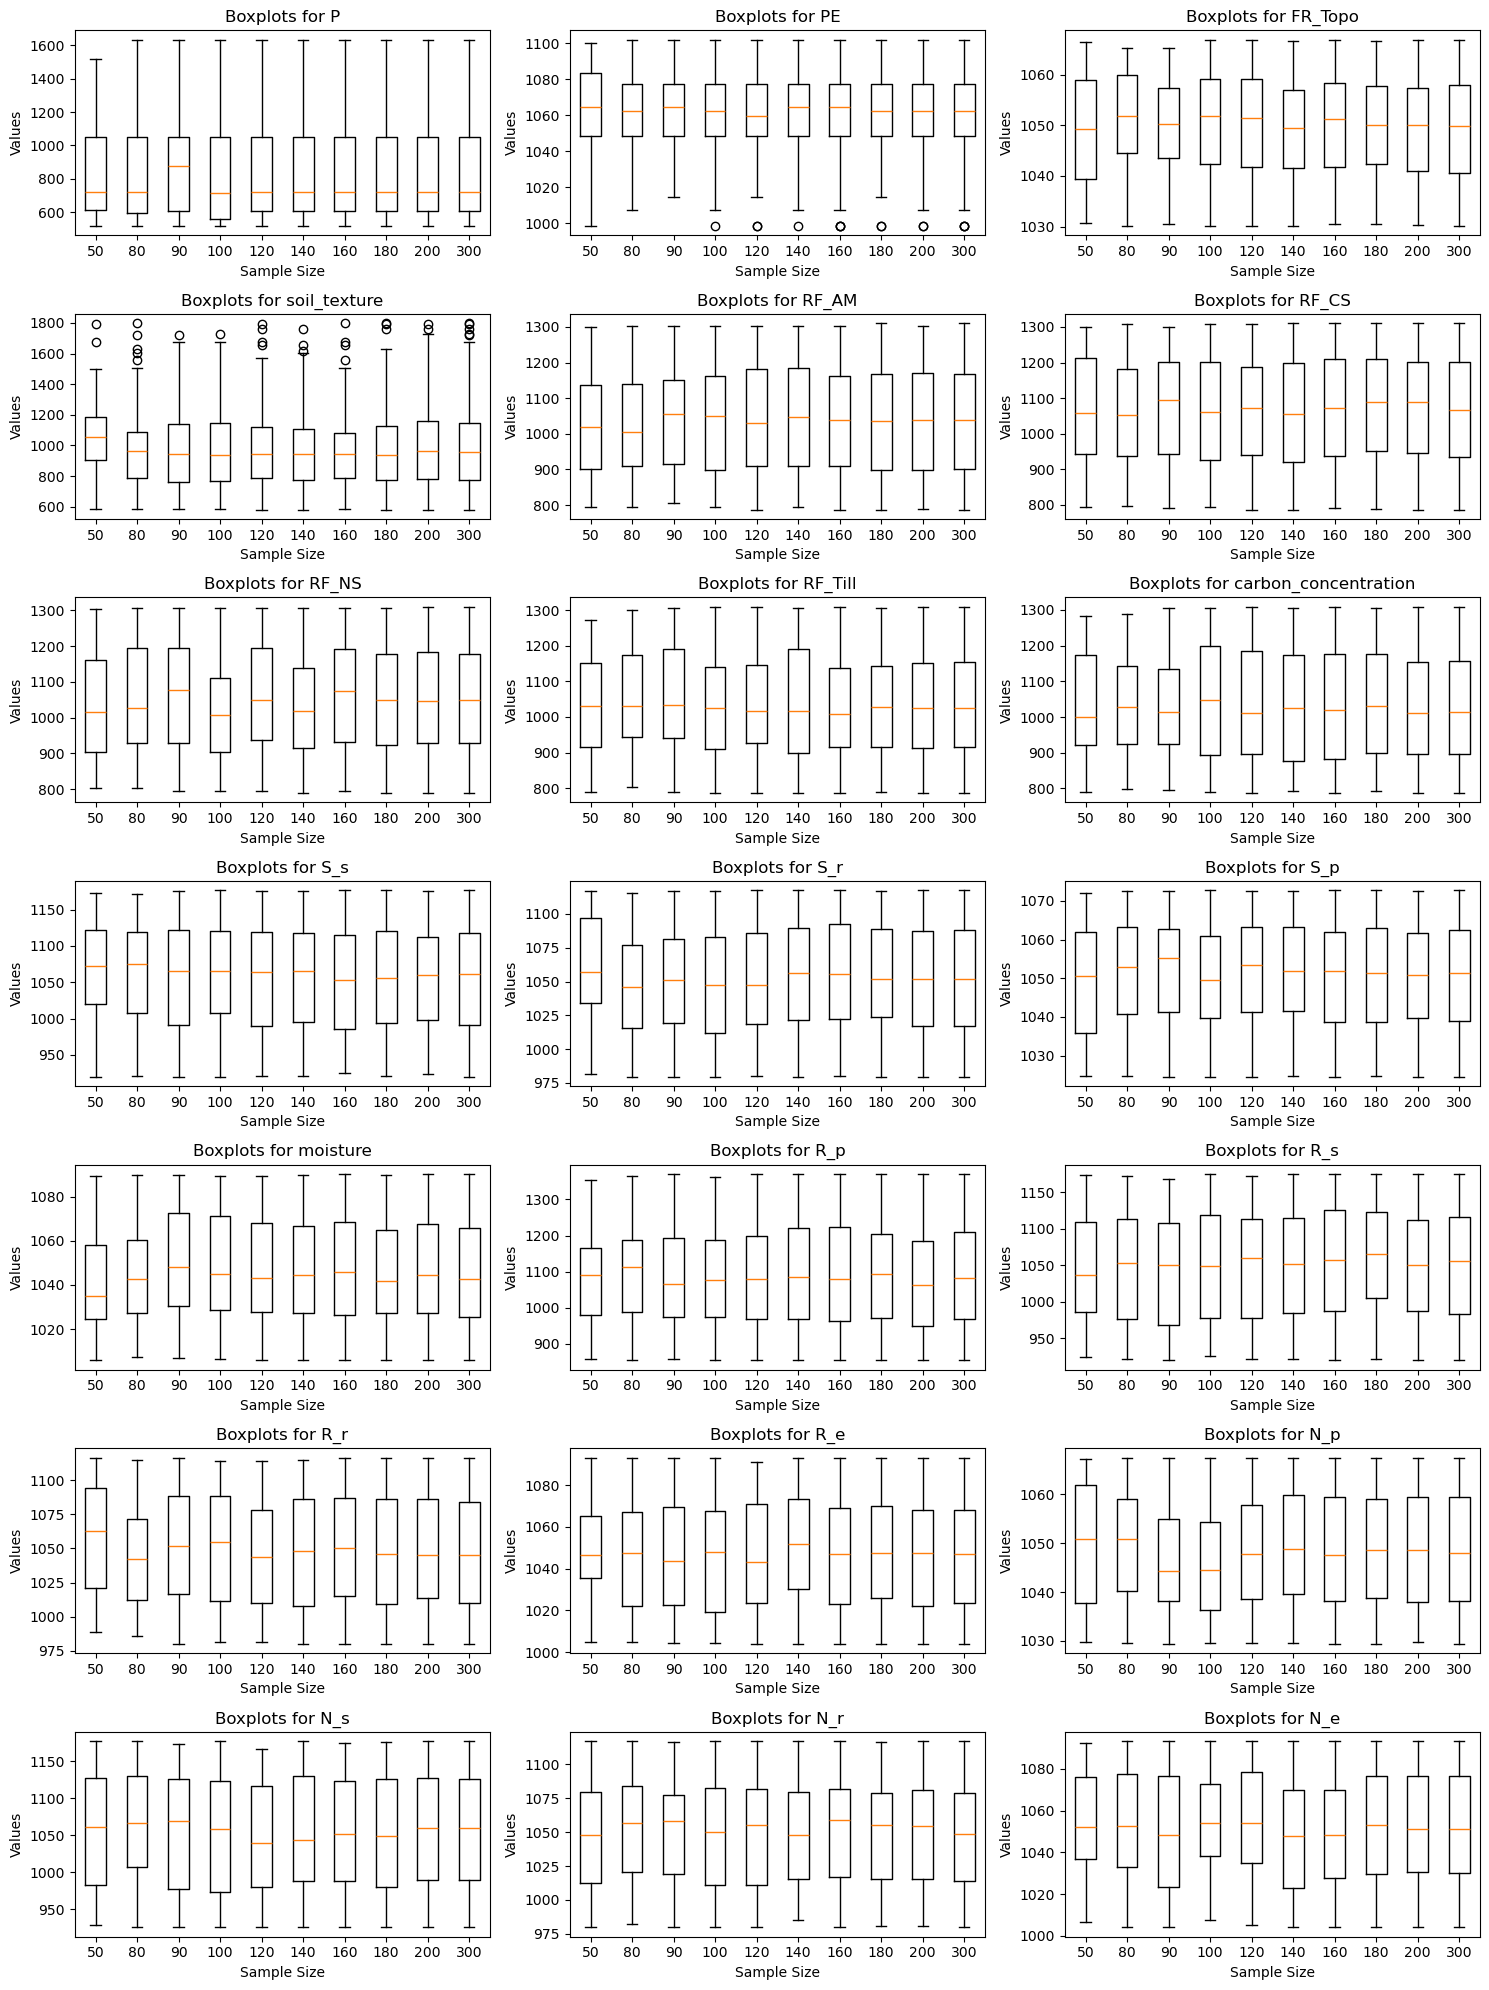

In [28]:
fig, axes = plt.subplots(7, 3, figsize=(15, 20))
axes = axes.flatten()
for ax, (key, samples) in zip(axes, sampling_results.items()):
    cleaned_samples = [list(filter(lambda x: not np.isnan(x), sublist)) for sublist in samples]
    cleaned_samples = [sublist for sublist in cleaned_samples if sublist]

    ax.boxplot(cleaned_samples)
    ax.set_title(f'Boxplots for {key}')
    ax.set_xticks(range(1, len(num_samples) + 1))
    ax.set_xticklabels(num_samples)
    ax.set_xlabel('Sample Size')
    ax.set_ylabel('Values')

plt.tight_layout()
plt.show()